## The Customer Cube

If the ARR calc is looking good, then it's time to aggregate everything. That's where the customer cube comes into play.

>*The loftier the building, the deeper must the foundation be laid.*
>
>   \- Thomas A Kempis

Jumping too quickly into the customer cube, can lead to issues. Start small and dive into the *what if* scenarios of your data. Make sure you can easily adjust your ARR calc especially for a company that is new to the idea.

### What is a Customer Cube?

A customer cube, at the very least, is ARR by month by customer by product. In terms of a visual, it's a matrix. Months as your column headers, ARR as your values, & everything else nested as your row headers.

| | |2024-01-31|2024-02-29|2024-03-31|2024-04-30|2024-05-31|2024-06-30|2024-07-31|
|---|---|---|---|---|---|---|---|---|
|Customer #1|Product #1|10,000|10,000|10,000|10,000|10,000|10,000|10,000|
|Customer #1|Product #2|8,000|8,000|8,000|8,000|8,000|8,000|8,000|
|Customer #2|Product #1|10,000|10,000|10,000|0|0|0|0|
|Customer #2|Product #2|8,000|8,000|8,000|0|0|0|0|
|Customer #2|Product #3|0|0|0|5,000|5,000|5,000|5,000|
|Customer #2|Product #4|0|0|0|12,000|12,000|12,000|12,000|
|Customer #3|Product #1|10,000|10,000|10,000|10,000|10,000|10,000|10,000|

In practice when building your model, just start schema.

|date_key|customer_key|product_key|arr|
|---|---|---|---|
|20240131|1|1|10000|
|20240229|1|1|10000|
|20240331|1|1|10000|
|20240430|1|1|10000|
|20240531|1|1|10000|
|20240630|1|1|10000|
|20240131|1|2|8000|
|20240229|1|2|8000|
|20240331|1|2|8000|
|...|...|...|...|
|20240531|3|1|10000|
|20240630|3|1|10000|

As your cube matures and requirements grow, it's natural for this cube to take on more datapoints and categorizations. Slap a key in the fact table and ***build***. I personally keep my bare minimum customer cube grain by month, customer, product, & *contract*.

<div class="alert alert-block alert-info">
I'll not be covering star schema. <a href="https://chrisadamson.com/star-schema-complete-reference/">Chris Adamson</a> does a much better job. Adamson lays out the technical, but with a lens of practicality. He conveys how data professionals will be involved in many decisions. These decisions are <i>business decisions</i> with <i>technical implications</i>.

One more time for the back of the room... <i>Business decisions</i> with <i>technical implications</i>. It's likely your data model will have issues, and sometimes, that's okay. These decisions will be made, whether yours or someone elses, to build in a sub-optimal way. You will constantly deal with resource, knowledge, time, cost, and political restraints. So, it's important to know when the technical implication (tech debt) is okay to take on and when it's not.

So, it's a great a thought by Adamson. Not just for data modelling, but for life. We're not perfect and neither is your data model.
</div>


### SaaS Corp LLC

Instead of writing a billion individual `Contract` dataclasses, I've created a fake company called *SaaS Corp LLC*. See the `data\build_contracts.py` file for how the fake data is generated. So I can ensure specific examples, the script also takes into consideration any manually generated contracts in the `data\saas_corp.xlsx` file.

Below are examples of the generated data. All company names were taken from [Mockaroo](https://mockaroo.com/), and I used co-pilot to help generate some typical SaaS acronyms.

In [2]:
from arr import Contract
from data.build_contracts import CONTRACTS

display(CONTRACTS.sample(10))
example = Contract.from_df(CONTRACTS[CONTRACTS['id'] == 121])
example

generating fake contracts...
reading manually added contracts...
performing initial sales...
performing subsequent renewals...
performing renewal cycle 1...
performing renewal cycle 2...
performing renewal cycle 3...
performing renewal cycle 4...
performing renewal cycle 5...
performing renewal cycle 6...
performing renewal cycle 7...
Contracts generated... see `CONTRACTS` variable


,id,customer,header.amount,header.start_date,header.end_date,header.booking_date,line.amount,line.start_date,line.end_date,line.product,line.renewable
1428,117,Roomm,85000,2026-04-14,2026-07-13,2026-04-14,6500,2026-04-14,2026-07-13,SCM,True
720,161,Lazz,66000,2024-05-25,2026-05-24,2024-05-25,13000,2024-05-25,2026-05-24,LMS,True
499,208,Youspan,81500,2023-01-18,2024-01-17,2023-01-18,7500,2023-01-18,2024-01-17,DevOps,True
209,269,Kamba,20000,2023-09-17,2023-12-16,2023-09-17,10000,2023-09-17,2023-12-16,VPN,True
549,196,Thoughtstorm,64500,2026-08-23,2027-08-22,2026-08-23,25000,2026-08-23,2027-08-22,ERP,True
484,211,Brainverse,35000,2025-05-23,2025-11-22,2025-05-23,10000,2025-05-23,2025-11-22,BI,True
665,173,Oodoo,84000,2024-09-24,2025-09-23,2024-09-24,10000,2024-09-24,2025-09-23,VPN,True
700,167,Midel,45500,2024-12-11,2025-12-10,2024-12-11,25000,2024-12-11,2025-12-10,ERP,True
24,307,Zoomzone,83500,2026-10-29,2027-10-28,2026-10-29,6500,2026-10-29,2027-10-28,SCM,True
1097,48,Tagchat,46500,2020-07-02,2021-07-01,2020-07-02,5000,2020-07-02,2021-07-01,DMS,True


                          Youspan                           
            Contract #121 - $81,500 - 2022-01-18            
                  2022-01-18 - 2023-01-17                   
************************************************************
product	start date	end date	amount	renewable
************************************************************
IAM	2022-01-18	2023-01-17	$6,000	True
ERP	2022-01-18	2023-01-17	$25,000	True
CRM	2022-01-18	2023-01-17	$10,000	True
HRIS	2022-01-18	2023-01-17	$13,000	True
VPN	2022-01-18	2023-01-17	$10,000	True
DevOps	2022-01-18	2023-01-17	$7,500	True
CMS	2022-01-18	2023-01-17	$5,000	True
DMS	2022-01-18	2023-01-17	$5,000	True
************************************************************

Cool, we have some fake data, but we don't stop here. An end user exporting from their source system can get the same kind of data. We need to create our customer cube.

I'll bring in a func called `annualize_df`. It does exactly that.

In [3]:
from arr import annualize_df

df = annualize_df(CONTRACTS)
df


ARR                                   \
period                    2020-01-31 2020-02-29 2020-03-31 2020-04-30   
customer id  line.product                                               
Abatz    1   CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
         125 CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
Avaveo   101 DMS                 0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
Zooveo   9   IAM                 0.0        0.0        0.0        0.0   
             ITS                 0.0        0.0        0.0        0.0   
Zoozzy   106 DevOps              0.0        0.0        0.0        0.0   
         210 DevOps              0.0        0.0        0.0        0.0   
         258 DevOps              0.0        0.0        0.0        0.0   

                                                                       \
period                    2020-05-31 2020-06-30 2020-07-31 2020-08-31   
customer id  line.product                                               
Abatz    1   CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
         125 CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
Avaveo   101 DMS                 0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
Zooveo   9   IAM                 0.0        0.0        0.0        0.0   
             ITS                 0.0        0.0        0.0        0.0   
Zoozzy   106 DevOps              0.0        0.0        0.0        0.0   
         210 DevOps              0.0        0.0        0.0        0.0   
         258 DevOps              0.0        0.0        0.0        0.0   

                                                                       \
period                    2020-09-30 2020-10-31 2020-11-30 2020-12-31   
customer id  line.product                                               
Abatz    1   CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
         125 CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
Avaveo   101 DMS                 0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
Zooveo   9   IAM                 0.0        0.0        0.0        0.0   
             ITS                 0.0        0.0        0.0        0.0   
Zoozzy   106 DevOps              0.0        0.0        0.0        0.0   
         210 DevOps              0.0        0.0        0.0        0.0   
         258 DevOps              0.0        0.0        0.0        0.0   

                                                                       \
period                    2021-01-31 2021-02-28 2021-03-31 2021-04-30   
customer id  line.product                                               
Abatz    1   CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
         125 CMS                 0.0        0.0        0.0        0.0   
             DMS                 0.0        0.0        0.0        0.0   
Avaveo   101 DMS                 0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
Zooveo   9   IAM                 0.0        0.0        0.0        0.0   
             ITS                 0.0        0.0        0.0        0.0   
Zoozzy   106 DevOps              0.0        0.0        0.0        0.0   
         210 DevOps              0.0        0.0        0.0        0.0   
         258 De

There you go. In the above example we have customer, contract, & product.

<Axes: title={'center': 'ARR over Time'}, xlabel='period'>

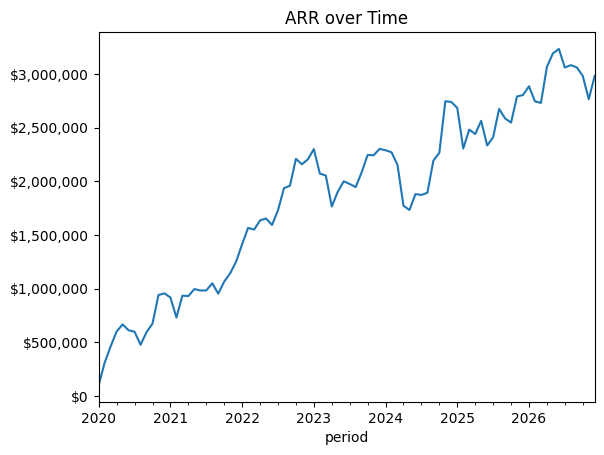

In [4]:
import pandas as pd
import matplotlib as mpl

a: pd.Series = df['ARR'].sum()
ax = a.loc['2020-01-31':'2026-12-31'].plot()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('${x:,.0f}')
)
ax.set_title('ARR over Time')
ax